In [4]:
import cv2
from darkflow.net.build import TFNet
import numpy as np
import time
import matplotlib.pyplot as plt

from PIL import Image
#import pytesseract

%config InlineBackend.figure_format = 'svg'

In [5]:
options = {
    'model': '/home/aalatir/Desktop/darkflow/cfg/tiny-yolo-voc-1c.cfg',
    'load': 11750,
    'threshold': 0.01,
    'gpu': 1.0
}
tfnet = TFNet(options)

Parsing /home/aalatir/Desktop/darkflow/cfg/tiny-yolo-voc-1c.cfg
Loading None ...
Finished in 0.00011754035949707031s


FileNotFoundError: [Errno 2] No such file or directory: 'labels.txt'

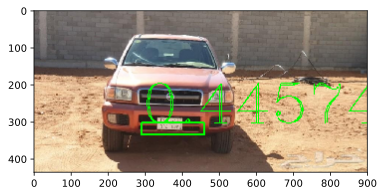

In [11]:
image = 'test_yolo/314SJE_438_329_289_403_323_34_74.jpg'
img = cv2.imread(image,1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = tfnet.return_predict(img)

max_confidence = max(range(len(result)), key=lambda index: result[index]['confidence'])
# pull out some info from the results

x1,y1 = result[max_confidence]['topleft']['x'], result[max_confidence]['topleft']['y']
x2,y2 = result[max_confidence]['bottomright']['x'], result[max_confidence]['bottomright']['y']

tl = (x1,y1)
br = (x2,y2)



h = y2 - y1
w = x2 - x1



label = str(result[max_confidence]['confidence'])



# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 3)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 5, (0, 255, 0), 2)

plt.imshow(img)
plt.show()



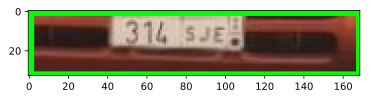

In [13]:
# Crop image and saving it:

crop_img = img[y1:y1+h, x1:x1+w]
cv2.imwrite('test_yolo/TEST_crop_ocr_1.png',crop_img)
# crop_img = cv2.imread('test_yolo/TEST_crop_ocr.png',1)
plt.imshow(crop_img) 
plt.show()


In [14]:

text = pytesseract.image_to_string(Image.open('test_yolo/example_01.png'))
print(text)
print('--- ')
text2 = pytesseract.image_to_string(Image.open('test_yolo/TEST_crop_ocr.png'))
print(text2)
# pytesseract.image_to_string(crop_img)

Noisy image
to test
Tesseract OCR
--- 



<class 'numpy.ndarray'>


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/filters/thresholding.py:278: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (33, 169, 3) looks like an RGB image
  warn(msg.format(image.shape))


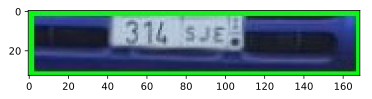

In [7]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage import io

image = io.imread('test_yolo/TEST_crop_ocr.jpg')
print ( type(image) )
thresh = threshold_otsu(image)
binary = image > thresh

plt.imshow(image, cmap = plt.cm.gray) 
plt.show()

In [8]:
imge = cv2.imread('test_yolo/example_01.png')
text = pytesseract.image_to_string(imge)
print(text)
text2 = pytesseract.image_to_string(dst)
print(text2)


Noisy image
to test
Tesseract OCR



In [2]:
### # crop_img = img[y1:y1+h, x1:x1+w]
# img = cv2.imwrite('test_yolo/TEST_crop_ocr.jpg',crop_img)
img = cv2.imread('test_yolo/TEST_crop_ocr.jpg')

# plt.imshow(img, cmap = plt.cm.gray) 
# plt.show()


gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_img, 127, 255, 1)
contours , _= cv2.findContours(thresh, cv2.RETR_TREE, 1)

cnt = contours
for i in range(len(contours)):

    #---- Mark contours above certain area ----
    if (cv2.contourArea(cnt[i]) > 1500):
        final_image = cv2.drawContours(img, cnt[i], -1, (0,255,0), 3)

plt.imshow(final_image, cmap = plt.cm.gray) 
plt.show()


error: OpenCV(4.0.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:

text = pytesseract.image_to_string(Image.open('test_yolo/example_01.png'))
print(text)
text2 = pytesseract.image_to_string(Image.open('test_yolo/KjD0v.png'))
print(text2)
# pytesseract.image_to_string(crop_img)

In [9]:

image_path = ['test_yolo/TEST_crop_ocr.jpg']
#load image
for image in image_path:
    img = cv2.imread(image)
    img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    #test 1
    #sharpen the image
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(img, -1, kernel)
    #thresholding
    ret,img_th = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
    #invert image
    inv_img = cv2.bitwise_not(img_th)
    

    #dilating image :
    kernel = np.ones((2,2),np.uint8)
    erosion = cv2.erode(inv_img,kernel,iterations = 1)
    text = pytesseract.image_to_string(inv_img)
    print(text)
    cv2.putText(img,text,(20,20),0, 5e-3 * 200, (255,255,255),2)
    cv2.imshow("Image:",inv_img)
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

error: OpenCV(4.0.0) /Users/travis/build/skvark/opencv-python/opencv/modules/photo/src/denoising.cpp:178: error: (-5:Bad argument) Type of input image should be CV_8UC3 or CV_8UC4! in function 'fastNlMeansDenoisingColored'


In [ ]:
# cnt = 0
# for i in result:
#     print(i)
#     print(cnt)
#     cnt += 1

In [ ]:
! which tesseract

In [ ]:
capture = cv2.VideoCapture('test_yolo/IMG_7711.MOV')
colors = [tuple(255 * np.random.rand(3)) for i in range(5)]
print(capture)
print(capture.isOpened())

while (capture.isOpened()):
    stime = time.time()
    ret, frame = capture.read()
    if ret:
        results = tfnet.return_predict(frame)
        for color, result in zip(colors, results):
            tl = (result['topleft']['x'], result['topleft']['y'])
            br = (result['bottomright']['x'], result['bottomright']['y'])
            label = result['label']
            frame = cv2.rectangle(frame, tl, br, color, 7)
            frame = cv2.putText(frame, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
        cv2.imshow('frame', frame)
        print('FPS {:.1f}'.format(1 / (time.time() - stime)))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        capture.release()
        cv2.destroyAllWindows()
        break

<VideoCapture 0x157c800b0>
True
FPS 1.1
FPS 10.2
FPS 11.2
FPS 10.7
FPS 11.4
FPS 11.1
FPS 10.8
FPS 11.7
FPS 11.1
FPS 11.0
FPS 12.0
FPS 12.0
FPS 11.2
FPS 12.1
FPS 11.2
FPS 11.6
FPS 11.8
FPS 12.1
FPS 11.2
FPS 11.3
FPS 11.1
FPS 11.1
FPS 11.5
FPS 11.1
FPS 11.1
FPS 11.7
FPS 11.7
FPS 11.0
FPS 11.4
FPS 11.6
FPS 10.9
FPS 11.5
FPS 10.6
FPS 11.3
FPS 10.9
FPS 11.0
